In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



# Carregar o dataset
df = pd.read_csv('./data/commerce_dataset_clean.csv', sep=';')

# Vamos verificar as primeiras linhas do dataset para entender sua estrutura
df.head()


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,vat,total,...,payment_method,cogs,gross_margin_pct,gross_income,rating,time_of_day,day_name,month_name,month,quarter
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.7619,26.1415,9.1,afternoon,Saturday,January,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.7619,3.8200,9.6,morning,Friday,March,3,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.7619,16.2155,7.4,afternoon,Sunday,March,3,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.7619,23.2880,8.4,evening,Sunday,January,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.7619,30.2085,5.3,morning,Friday,February,2,1


In [49]:
# Vamos começar calculando e apresentando as métricas solicitadas uma a uma, e em seguida criar os gráficos correspondentes.

# Total de vendas no período
total_sales = df['total'].sum()

# Número total de produtos vendidos
total_products_sold = df['quantity'].sum()

# Média de preço unitário por linha de produto
avg_price_per_line = df.groupby('product_line')['unit_price'].mean()

# Linha de produto mais vendido (em termos de quantidade)
most_sold_line = df.groupby('product_line')['quantity'].sum().idxmax()

# As 5 linhas de produtos mais bem avaliados (média de rating mais alta)
top_rated_lines = df.groupby('product_line')['rating'].mean().nlargest(5)

# Loja com o maior volume de vendas
top_sales_branch = df.groupby('branch')['total'].sum().idxmax()

# Método de pagamento mais popular por loja e mês
popular_payment_method = df.groupby(['branch', 'month_name'])['payment_method'].agg(lambda x:x.value_counts().idxmax()).unstack()
payment_method_popularity = df.groupby(['branch', 'month_name', 'payment_method']).size().unstack().fillna(0)


# As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente
top_lines_by_gender = df.groupby(['gender', 'product_line'])['quantity'].sum().groupby(level=0).nlargest(3)

# Produto mais lucrativo (maior receita gross_income) por filial (branch)
most_profitable_product_by_branch = df.groupby(['branch', 'product_line'])['gross_income'].sum().groupby(level=0).nlargest(1)

# Produto mais lucrativo (maior receita gross_income) por quarter
most_profitable_product_by_quarter = df.groupby(['quarter', 'product_line'])['gross_income'].sum().groupby(level=0).nlargest(1)

# Período do dia em que ocorre o maior número de vendas
sales_by_time_of_day = df['time_of_day'].value_counts()

# Preparar a análise detalhada por quarter, região e categoria de produto para visualização posterior

# Apresentando os resultados calculados como KPIs
kpi_results = {
    "Total de Vendas no Período": total_sales,
    "Número Total de Produtos Vendidos": total_products_sold,
}

# Vamos prosseguir com a geração de alguns gráficos para as métricas calculadas
kpi_results, avg_price_per_line, most_sold_line, top_rated_lines, top_sales_branch


({'Total de Vendas no Período': 322966.749,
  'Número Total de Produtos Vendidos': 5510},
 product_line
 Electronic accessories    53.551588
 Fashion accessories       57.153652
 Food and beverages        56.008851
 Health and beauty         54.854474
 Home and lifestyle        55.316937
 Sports and travel         56.993253
 Name: unit_price, dtype: float64,
 'Electronic accessories',
 product_line
 Food and beverages        7.113218
 Fashion accessories       7.029213
 Health and beauty         7.003289
 Electronic accessories    6.924706
 Sports and travel         6.916265
 Name: rating, dtype: float64,
 'C')

# Graficos

#### 1 - Total de vendas no período
#### 2 - Número total de produtos vendidos
#### 3 - Média de preço unitário por linha de produto
#### 4 - Linha de produto mais vendido (em termos de quantidade)
#### 5 - As 5 linhas de produtos mais bem avaliados (média de rating mais alta)
#### 6 - Loja com o maior volume de vendas
#### 7 - Método de pagamento mais popular por loja e mês
#### 8 - As 3 linhas de produtos com mais quantidades vendidas por gênero do cliente
#### 9 - Produto mais lucrativo (maior receita gross_income) por filial (branch)
#### 10 - Produto mais lucrativo (maior receita gross_income) por quarter
#### 11 - Período do dia em que ocorre o maior número de vendas
#### 12 - Análise detalhada por quarter, região e categoria de produto para visualização posterior


In [50]:
# 1 - Total de vendas no período - kpi
# 2 - Número total de produtos vendidos - kpi

kpi_results

{'Total de Vendas no Período': 322966.749,
 'Número Total de Produtos Vendidos': 5510}

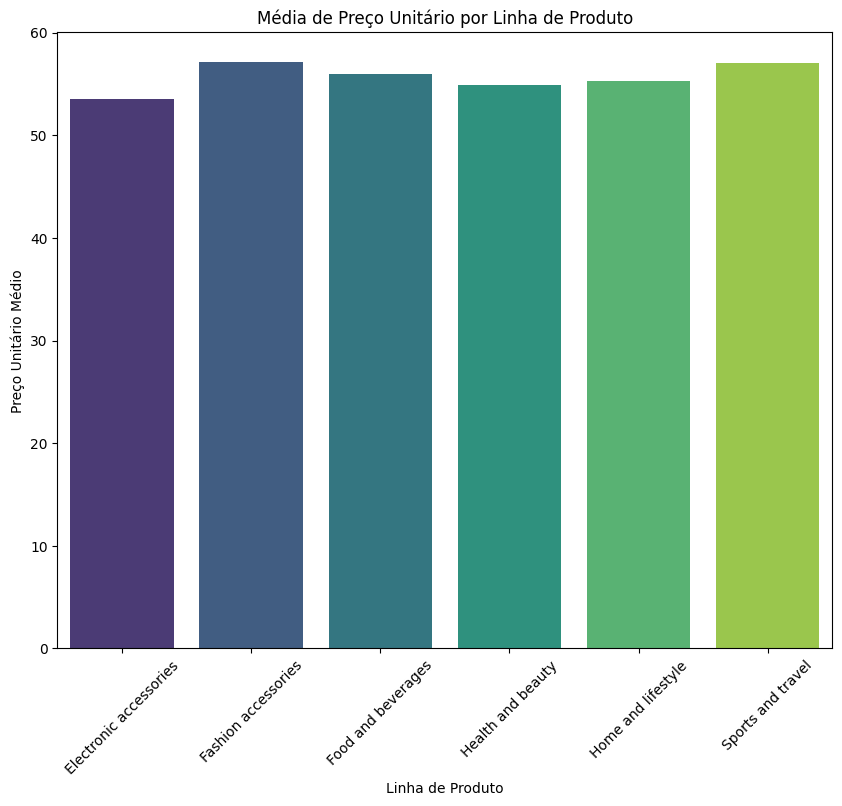

In [51]:
# 3 Média de preço unitário por linha de produto usando seaborn

# Vamos criar um gráfico de barras para visualizar a média de preço unitário por linha de produto
plt.figure(figsize=(10, 8))
sns.barplot(x=avg_price_per_line.index, y=avg_price_per_line.values, hue=avg_price_per_line.index, palette='viridis', legend=False)
plt.title('Média de Preço Unitário por Linha de Produto')
plt.xlabel('Linha de Produto')
plt.ylabel('Preço Unitário Médio')
plt.xticks(rotation=45)
plt.show()

Linha de produto mais vendida: Electronic accessories


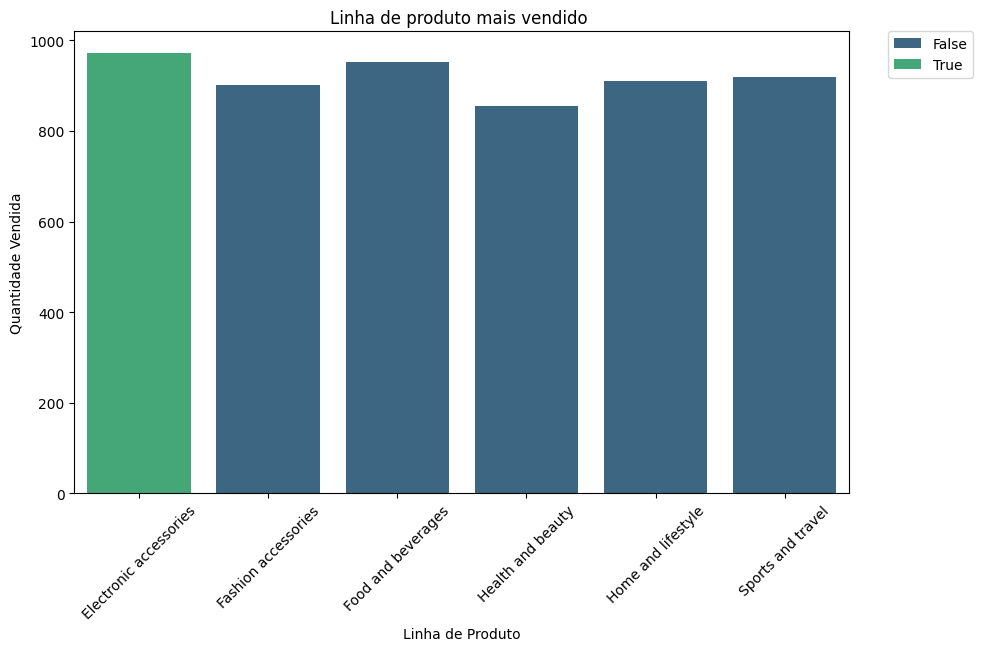

In [52]:
# 4 - Linha de produto mais vendido (em termos de quantidade) -> usando seaborn e deixando uma cor diferente para a linha de produto mais vendida
print(f'Linha de produto mais vendida: {most_sold_line}')

# Calcule a quantidade vendida por linha de produto
quantity_per_product_line = df.groupby('product_line')['quantity'].sum().reset_index()

# Encontre a linha de produto mais vendida
most_sold_product = quantity_per_product_line.loc[quantity_per_product_line['quantity'].idxmax(), 'product_line']

# Crie uma nova coluna que é True para a linha de produto mais vendida e False para as outras
quantity_per_product_line['is_most_sold'] = quantity_per_product_line['product_line'] == most_sold_product

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='product_line', y='quantity', hue='is_most_sold', data=quantity_per_product_line, palette='viridis')

plt.title('Linha de produto mais vendido ')
plt.xlabel('Linha de Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)

# Redimensione a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()


As 5 linhas de produtos mais bem avaliados (média de rating mais alta): 
product_line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Name: rating, dtype: float64


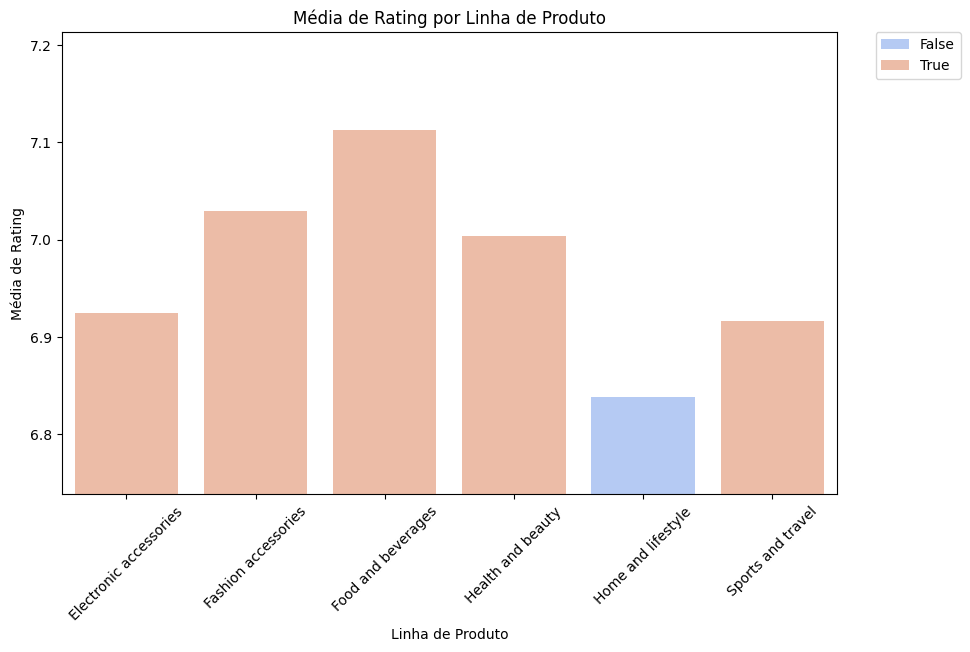

In [53]:
# 5 - As 5 linhas de produtos mais bem avaliados (média de rating mais alta) -> usando seaborn e deixando uma cor diferente para as linhas de produto mais bem avaliadas
print(f'As 5 linhas de produtos mais bem avaliados (média de rating mais alta): \n{top_rated_lines}')

# Calcule a média de rating para cada linha de produto

average_rating = df.groupby('product_line')['rating'].mean().reset_index()

# Selecione as 5 linhas de produtos com a média de rating mais alta
top5_product_lines = average_rating['rating'].nlargest(5).index

# Crie uma nova coluna que é True para as top 5 linhas de produtos e False para as outras
average_rating['is_top5'] = average_rating.index.isin(top5_product_lines)

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='product_line', y='rating', hue='is_top5', data=average_rating, palette='coolwarm')

plt.title('Média de Rating por Linha de Produto') # As 5 linhas de produtos mais bem avaliados com uma cor diferente
plt.xlabel('Linha de Produto')
plt.ylabel('Média de Rating')
plt.xticks(rotation=45)

# Ajuste os limites do eixo y para dar um zoom
plt.ylim(average_rating['rating'].min() - 0.1, average_rating['rating'].max() + 0.1)

# Redimensione a legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Loja com o maior volume de vendas: C


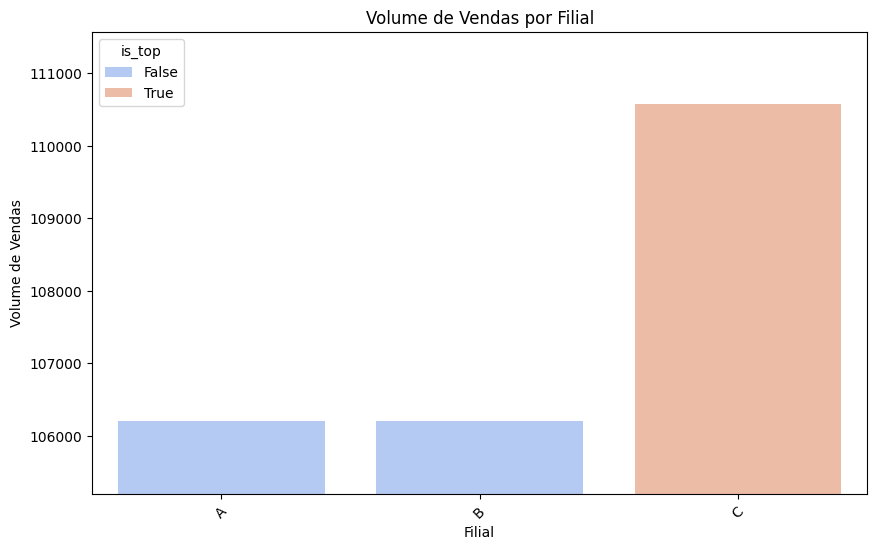

In [54]:
# 6 - Loja com o maior volume de vendas
print(f'Loja com o maior volume de vendas: {top_sales_branch}')

# Calcule o volume de vendas por filial
sales_per_branch = df.groupby('branch')['total'].sum().reset_index()

# Crie uma nova coluna que é True para a filial com o maior volume de vendas e False para as outras
sales_per_branch['is_top'] = sales_per_branch['branch'] == top_sales_branch

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='branch', y='total', hue='is_top', data=sales_per_branch, palette='coolwarm', dodge=False)

plt.title('Volume de Vendas por Filial')
plt.xlabel('Filial')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=45)

# Ajuste os limites do eixo y para dar um zoom
plt.ylim(sales_per_branch['total'].min() - 1000, sales_per_branch['total'].max() + 1000)

plt.show()

Método de pagamento mais popular por loja e mês: 
month_name February      January    March
branch                                   
A           Ewallet      Ewallet  Ewallet
B              Cash  Credit card  Ewallet
C              Cash         Cash     Cash


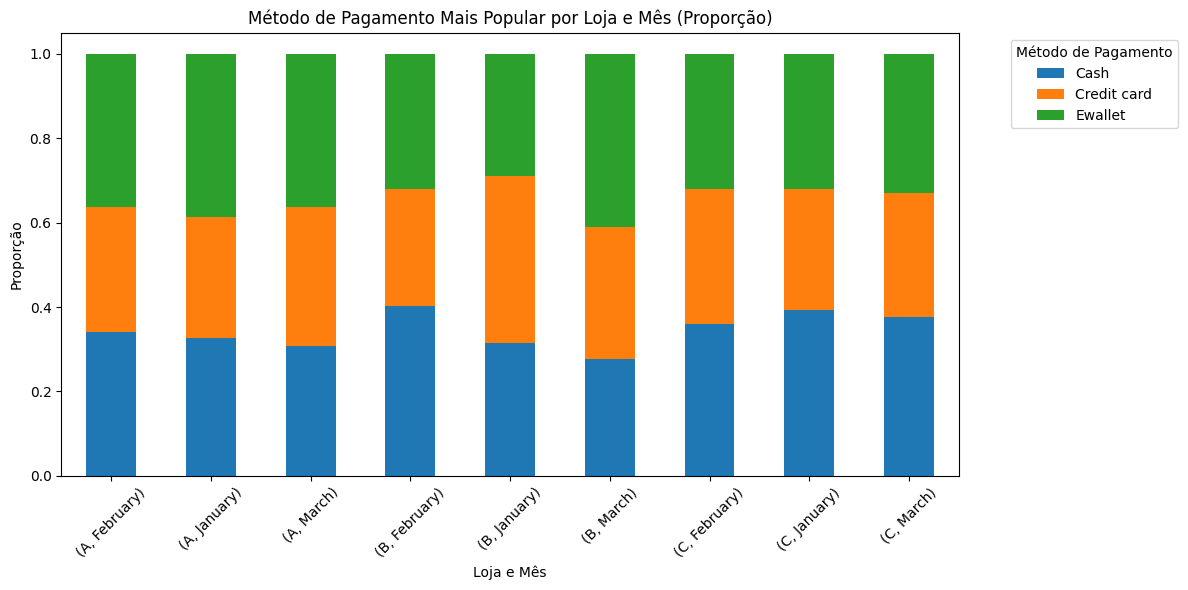

In [57]:
# 7 - Método de pagamento mais popular por loja e mês -> opassar para proporção
print(f'Método de pagamento mais popular por loja e mês: \n{popular_payment_method}')
# print(f'Método de pagamento mais popular por loja e mês: \n{payment_method_popularity}')

# Método de pagamento mais popular por loja e mês: Gráficos de barras empilhadas
# Normalizando os dados
payment_method_proportion = payment_method_popularity.div(payment_method_popularity.sum(axis=1), axis=0)

# Plotando o gráfico de barras empilhadas
payment_method_proportion.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Método de Pagamento Mais Popular por Loja e Mês (Proporção)')
plt.xlabel('Loja e Mês')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.legend(title='Método de Pagamento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



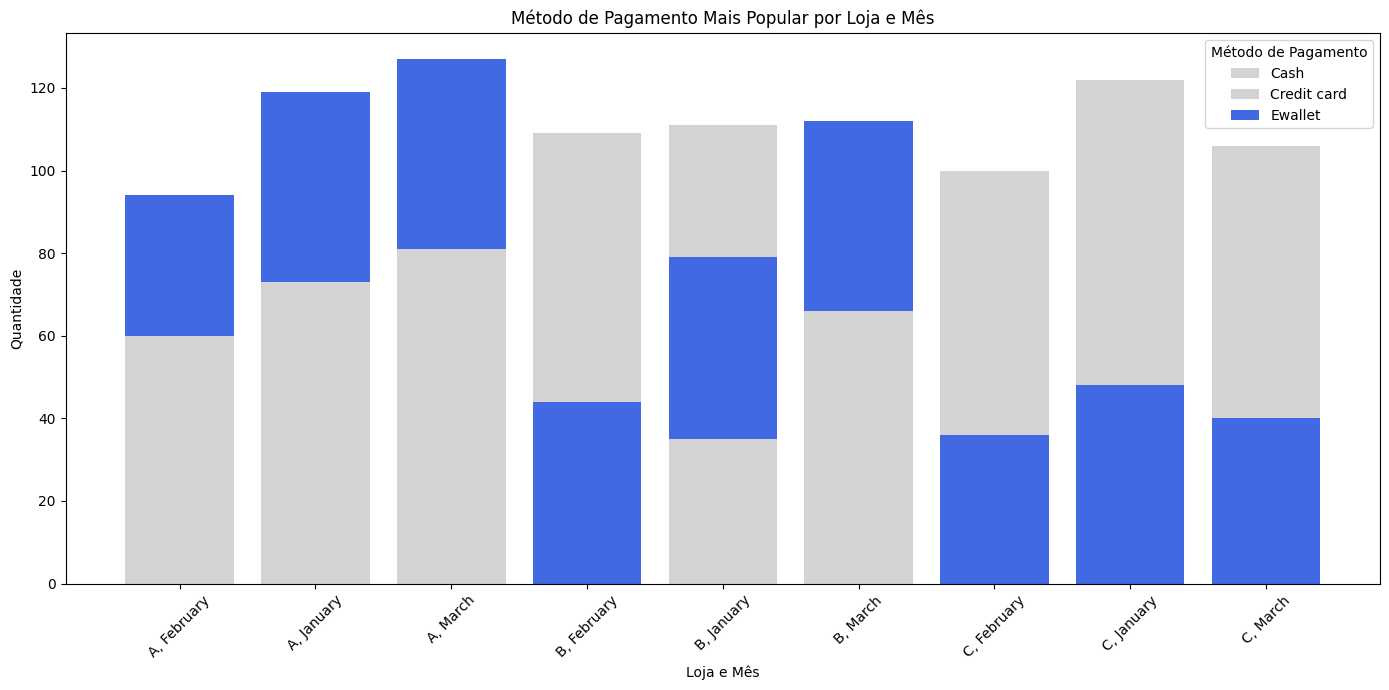

In [56]:


# Determinando o método de pagamento mais popular por loja e mês
most_popular_payment_method = df.groupby(['branch', 'month_name'])['payment_method'].agg(lambda x:x.value_counts().idxmax())

# Mapeando cores específicas para cada método de pagamento
color_map = {'Cash': 'lightgray', 'Ewallet': 'lightgray', 'Credit card': 'lightgray'}
highlight_color = 'royalblue'  # Cor para destacar o "ganhador"

# Preparando os dados para plotagem
payment_methods = df.groupby(['branch', 'month_name', 'payment_method']).size().unstack(fill_value=0)
# Convert the MultiIndex to a string for both DataFrames
most_popular_payment_method.index = most_popular_payment_method.index.map(lambda x: ', '.join(x))
payment_methods.index = payment_methods.index.map(lambda x: ', '.join(x))



# Criando o gráfico de barras empilhadas com cores personalizadas
fig, ax = plt.subplots(figsize=(14, 7))
bottom = np.zeros(len(payment_methods))

for payment_method in payment_methods.columns:
    # Determinando a cor para cada método de pagamento
    colors = [highlight_color if most_popular_payment_method[branch_month] == payment_method else color_map[payment_method] 
              for branch_month in payment_methods.index]
    
    ax.bar(payment_methods.index, payment_methods[payment_method], bottom=bottom, label=payment_method, color=colors)
    bottom += payment_methods[payment_method].values

ax.set_title('Método de Pagamento Mais Popular por Loja e Mês')
ax.set_xlabel('Loja e Mês')
ax.set_ylabel('Quantidade')
ax.legend(title='Método de Pagamento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
